In [3]:
from metrics import get_metrics_fuzzy, xie_beni
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
#%cd ..

In [5]:
%cd code

C:\Users\girob\Documents\MAI\IML\clusteringmethods\code


In [1]:
from preprocessing import preprocess_sick, preprocess_grid, preprocess_vowel
from fuzzyclustering import gs_fcm, update_membership_matrix, defuzzyfy
from utils import plot_clusters
import numpy as np
from main import load_ds

In [6]:
from scipy.io.arff import loadarff
import pandas as pd
df_sick, meta_train = loadarff(f'../datasets/sick.arff')

# Define datasets
df_sick = pd.DataFrame(df_sick)

# Decode utf8 columns
for col in df_sick.columns:
    df_sick[col].map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

In [9]:
count = (df_sick["age"] > 90).sum()
print(count)

9


In [13]:
from main import load_ds

df_X, df_y = load_ds("grid")

In [23]:
np.array(df_y)

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

GS_FCM converged in 65 iterations.
{'Method': 'Fuzzy', 'ARI': 0.0904384297289794, 'Purity': 0.8379237288135594, 'F-Measure': 0.2870623984515808, 'Davies-Bouldin Index': 0.7974705601327033, 'Silhouette Coefficient': 0.3427090332146427, 'Xie-Beni': 0.0995362959573033, 'Solving Time': None, 'Iterations': 65}
Cluster point distribution: 
Cluster 0 - Points shape: (142, 2)
Cluster 1 - Points shape: (153, 2)
Cluster 2 - Points shape: (144, 2)
Cluster 3 - Points shape: (172, 2)
Cluster 4 - Points shape: (162, 2)
Cluster 5 - Points shape: (139, 2)
Cluster 6 - Points shape: (167, 2)
Cluster 7 - Points shape: (157, 2)
Cluster 8 - Points shape: (182, 2)
Cluster 9 - Points shape: (164, 2)
Cluster 10 - Points shape: (154, 2)
Cluster 11 - Points shape: (152, 2)


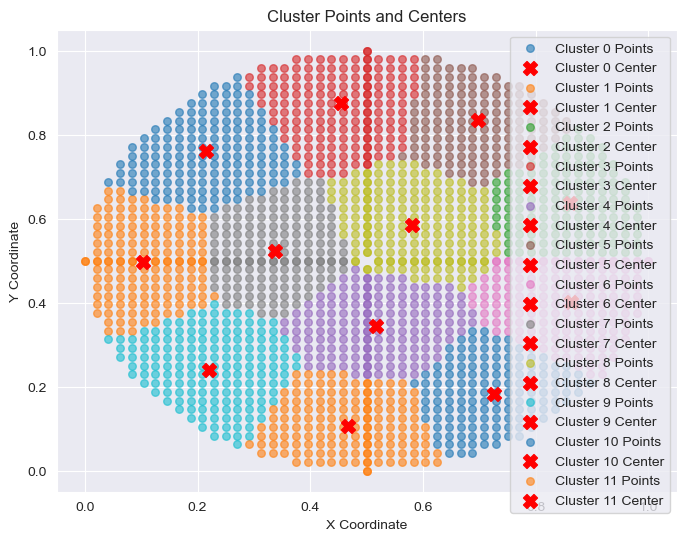

In [44]:
from fuzzyclustering import gs_fcm, get_cluster_list, defuzzyfy
from utils import plot_clusters
from metrics import get_metrics_fuzzy, xie_beni
import numpy as np
# Number of clusters
C = 12
m = 2
eta = 0.3

u, iters, centers = gs_fcm(df_X,C,m,suppress=True,generalized=True,eta=eta)
print(f"GS_FCM converged in {iters} iterations.")
clusters = defuzzyfy(u)
assignments = get_cluster_list(df_X,centers,clusters,C)
print(get_metrics_fuzzy(df_X,np.array(df_y),clusters,"Fuzzy",None,iters,u,centers,m))
plot_clusters(assignments)

In [50]:
from main import runAllFuzzyClustering

datasets = ["vowel"]#,"sick","vowel"]
runAllFuzzyClustering(datasets)

Processing DS=vowel k=8, m=1.75, eta=0.1:   0%|          | 0/3 [00:09<?, ?it/s]        C:\Users\girob\Documents\MAI\IML\clusteringmethods\code\metrics.py:56: RuntimeWarning: divide by zero encountered in double_scalars
  xie_beni_index = numerator / (n * min_distance)


In [8]:
import pandas as pd 

df = pd.read_csv('../output/fuzzyclustering_sick.csv')

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

df = df.sort_values(by='Silhouette Coefficient', ascending=False)
df[['Model', 'k', 'm', 'eta']] = df['Method'].str.split('_', expand=True)

# Further process to clean up the extracted columns
df['k'] = df['k'].str.extract('(\d+)', expand=False)  # Extract just the number for k
df['m'] = df['m'].str.extract('(\d+\.\d+|\d+)', expand=False)  # Extract number for m
df['eta'] = df['eta'].str.extract('(\d+\.\d+|\d+)', expand=False)  # Extract number for eta

# Combine the extracted components into a readable format
df['Formatted_Method'] = df['Model'] + ' (k=' + df['k'] + ', m=' + df['m'] + ', eta=' + df['eta'] + ')'

final_df = df[["k","m","eta","ARI","Silhouette Coefficient","Iterations","Solving Time"]].head(10)

print(final_df)

#latex_table = final_df.to_latex(index=False)
#print(latex_table)

      k     m  eta       ARI  Silhouette Coefficient  Iterations  Solving Time
118  11     2  0.5 -0.000925                0.409673          18      0.546453
115  11  1.75  0.5 -0.000688                0.406467          12      0.473249
92    9  1.75  0.9  0.004924                0.402822          10      0.331038
111  11   1.5  0.1 -0.000612                0.402036          37      1.386556
119  11     2  0.9  0.002284                0.400633           7      0.284457
113  11   1.5  0.9  0.005665                0.399903           9      0.352872
104  10  1.75  0.9  0.001394                0.398175           6      0.230314
117  11     2  0.1 -0.000226                0.396823          59      1.705783
84    9  1.05  0.1  0.005022                0.395290           9      0.393250
103  10  1.75  0.5 -0.000693                0.393002          14      0.502293
